# Taller PDI

## Ejercicio 25%
Realice las operaciones necesarias (incluyendo operaciones morfológicas y de
segmentación) sobre la imagen objects.png para conservar únicamente los dos
bolígrafos preservando sus niveles de gris originales (el resto de la imagen debe
quedar negra).
(Ayuda: Consultar sobre análisis de componentes conexos)

### Imports

In [156]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, measure

### PDI

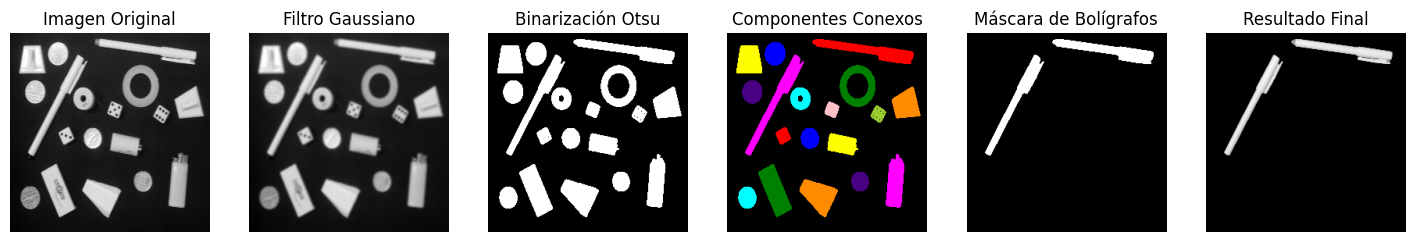

In [157]:
# Cargar la imagen
image = io.imread('./imgs/OBJECTS.png', as_gray=True)

blurred = filters.gaussian(image, sigma=1)

# Umbralización automática usando Otsu
threshold_value = filters.threshold_otsu(blurred)
binary = blurred > threshold_value  # Convierte en imagen binaria

# Etiquetado de componentes conexos
labels = measure.label(binary)

# Medir propiedades de los objetos detectados
regions = measure.regionprops(labels)

filtered_regions = [r for r in regions if r.area > 100]  # Reducimos el área mínima

# Ordenar los objetos por tamaño y seleccionar los dos más grandes
sorted_regions = sorted(filtered_regions, key=lambda x: x.area, reverse=True)[0:2]  # Evitamos el fondo

# Crear una máscara negra
mask = np.zeros_like(image, dtype=bool)

# Mantener solo los bolígrafos en la máscara
for region in sorted_regions:
    mask[tuple(region.coords.T)] = True

# Aplicar la máscara sobre la imagen original
result = np.zeros_like(image)
result[mask] = image[mask]  # Mantiene solo los píxeles de los bolígrafos

# Mostrar todas las etapas del procesamiento
fig, ax = plt.subplots(1, 6, figsize=(18, 4))

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Imagen Original")

ax[1].imshow(blurred, cmap='gray')
ax[1].set_title("Filtro Gaussiano")

ax[2].imshow(binary, cmap='gray')
ax[2].set_title("Binarización Otsu")

ax[3].imshow(color.label2rgb(labels, bg_label=0))
ax[3].set_title("Componentes Conexos")

ax[4].imshow(mask, cmap='gray')
ax[4].set_title("Máscara de Bolígrafos")

ax[5].imshow(result, cmap='gray')
ax[5].set_title("Resultado Final")

for a in ax:
    a.axis("off")

plt.show()


## Mini proyecto: 75%

### Proyecto
Las microfracturas en los huesos suelen ser difíciles de detectar mediante técnicas de imagen tradicionales. Identificar estas fracturas es crucial para un diagnóstico temprano y un tratamiento adecuado. Este proyecto tiene como objetivo desarrollar un flujo de procesamiento de imágenes para analizar microfracturas en general, utilizando técnicas de procesamiento digital de imágenes.

#### Importaciones

In [158]:
from skimage.filters import sobel, median, unsharp_mask
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage

#### Funciones

In [159]:
def comparar_images(imagen1, imagen2):
  _, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
  ax1.imshow(imagen1, cmap='gray')
  ax1.set_title('Imagen Original')
  ax1.axis('off')

  ax2.imshow(imagen2, cmap='gray')
  ax2.set_title('Imagen Procesada')
  ax2.axis('off')

  plt.show()

#### Imagen

Shape: (419, 835)


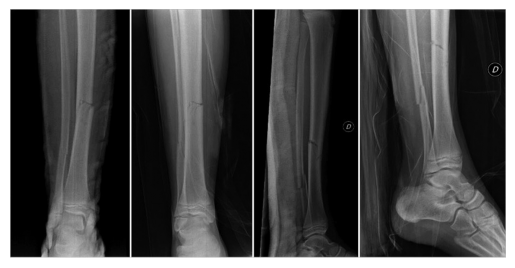

In [160]:
image = skimage.io.imread('./imgs/torus_3.jpg', as_gray=True)
print("Shape:", image.shape)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

#### Filtros

##### Mediana

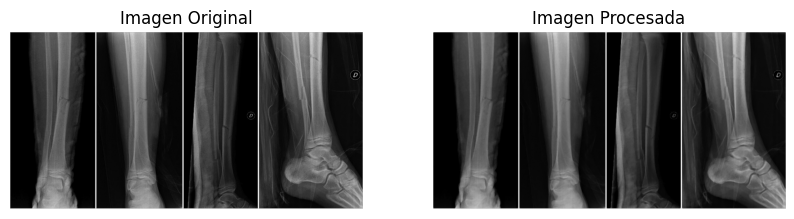

In [161]:
imagen_suavizada_median = median(image)
comparar_images(image, imagen_suavizada_median)

##### Mejora de nitidez

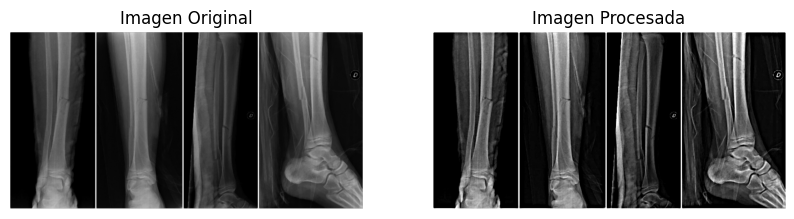

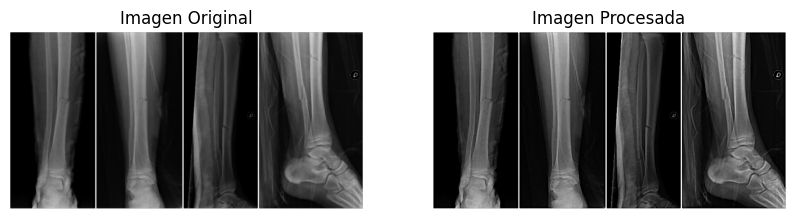

In [182]:
image_nitida = unsharp_mask(imagen_suavizada_median, radius=5, amount=2)
comparar_images(imagen_suavizada_median, image_nitida)

image_nitida = unsharp_mask(imagen_suavizada_median, radius=2, amount=1)
comparar_images(imagen_suavizada_median, image_nitida)

#### Detección de bordes

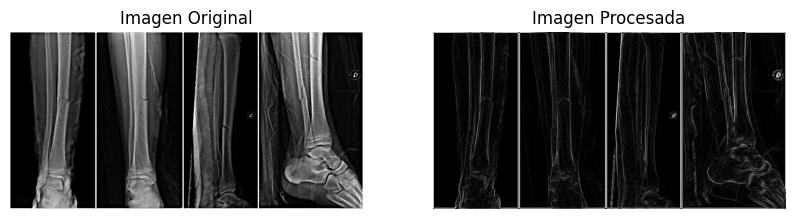

In [163]:
image_bordes = sobel(image_nitida)
comparar_images(image_nitida, image_bordes)

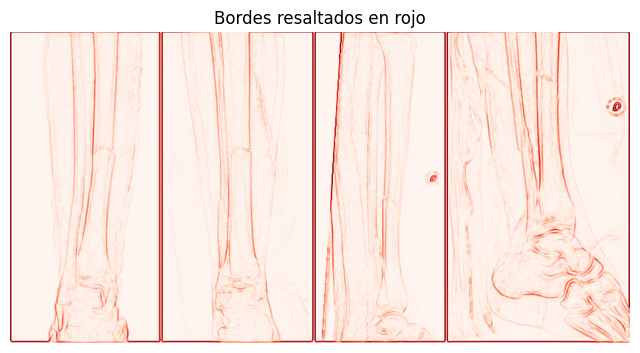

In [164]:
plt.figure(figsize=(8, 6))
plt.imshow(image_bordes, cmap="Reds")
plt.axis("off")
plt.title("Bordes resaltados en rojo")
plt.show()

#### Resultados

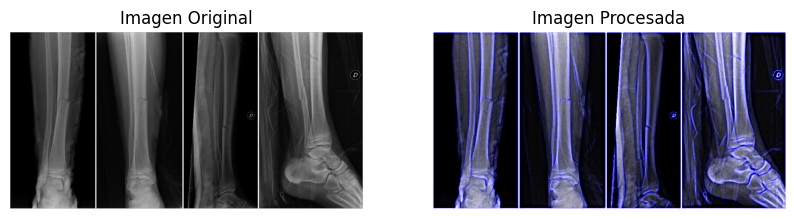

In [165]:
# Convertir imagen a RGB
image_rgb = cv2.cvtColor((image_nitida * 255).astype(np.uint8), cv2.COLOR_GRAY2BGR)

# Crear una máscara de color azul donde están los bordes
edges_color = np.zeros_like(image_rgb)
edges_color[:, :, 0] = (image_bordes * 255).astype(np.uint8)  # Azul en canal B

# Superponer bordes sobre la imagen con transparencia (alpha=4)
overlay = cv2.addWeighted(image_rgb, 1, edges_color, 4, 0)

# Mostrar resultado
comparar_images(image, cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))


### Pruebas

#### Imports

In [166]:
from skimage import color
from skimage.filters import threshold_otsu, sobel
from skimage.morphology import label, footprint_rectangle, opening, dilation, erosion
import skimage.filters as filters
import matplotlib.pyplot as plt
import numpy as np
import skimage.util as util

from skimage import exposure, restoration, segmentation
from skimage.segmentation import slic
import skimage

#### Imagen

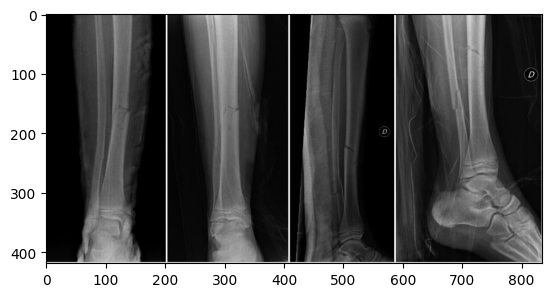

In [167]:
image = io.imread('./imgs/torus_3.jpg', as_gray=True)
plt.imshow(image, cmap='gray')
#Imagen original
plt.show()

Exploración de la imagen

In [168]:
image.shape
#La imagen ya está en escala de grises

(419, 835)

#### Funciones

In [169]:
def comparar_images(imagen1, imagen2):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
  ax1.imshow(imagen1, cmap='gray')
  ax1.set_title('Imagen Original')
  ax1.axis('off')

  ax2.imshow(imagen2, cmap='gray')
  ax2.set_title('Imagen Procesada')
  ax2.axis('off')

  plt.show()

#### Filtros

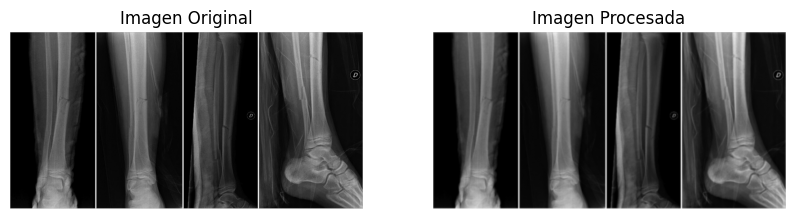

In [170]:
imagen_suavizada_gaussian = filters.gaussian(image)
comparar_images(image, imagen_suavizada_gaussian)

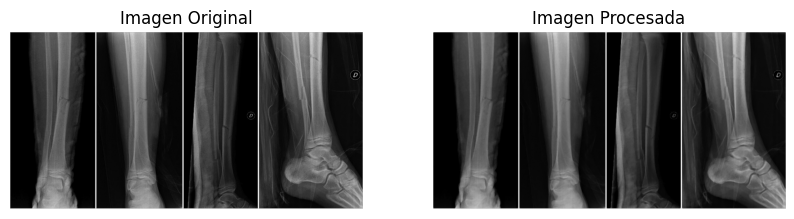

In [171]:
imagen_suavizada_median = filters.median(image)
comparar_images(image, imagen_suavizada_median)

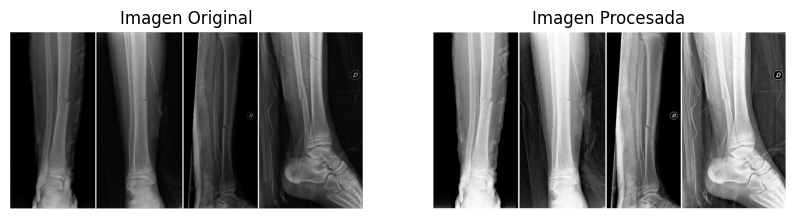

In [172]:
#Ecualización del histograma
imagen_ecualizada = exposure.equalize_hist(image)
comparar_images(image, imagen_ecualizada)

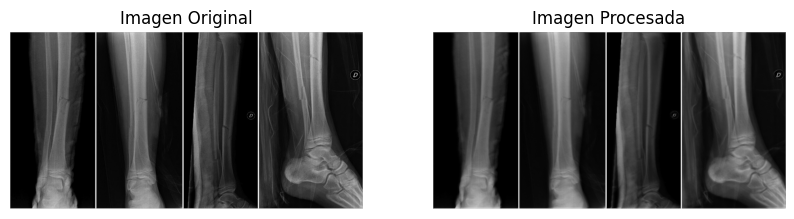

In [173]:
#Filtro bilateral para: smoothening images and reducing noise, while preserving edges.

imagen_filtrada_bilateral = restoration.denoise_bilateral(image)
comparar_images(image, imagen_filtrada_bilateral)

#### Detección de bordes

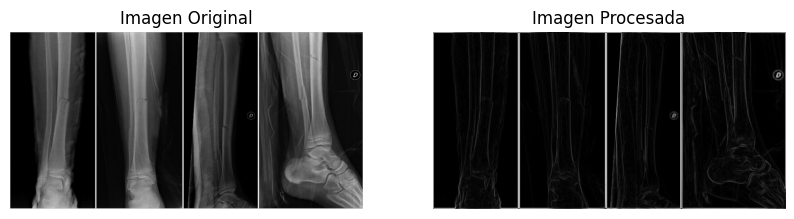

In [174]:
# Detección bordes usando el filtro Sobel
bordes = skimage.filters.sobel(image)
comparar_images(image, bordes)

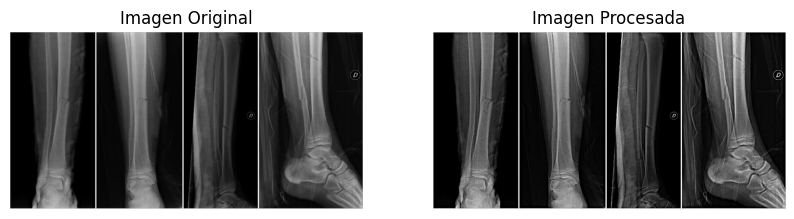

In [175]:
#Se escalan los detalles y se agregan a la imagen original
enhanced_image = filters.unsharp_mask(image, radius=3, amount=1)
comparar_images(image, enhanced_image)

#### Operaciones morfológicas (apertura)

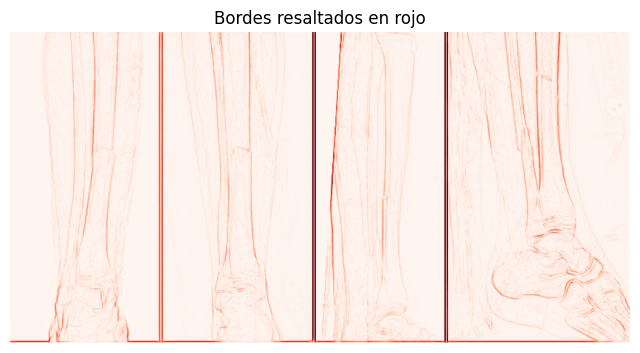

In [176]:
imagen_color = np.dstack([image, image, image])

imagen_abierta = opening(enhanced_image, footprint_rectangle((3, 3)))
bordes_imagen_abierta = filters.sobel(imagen_abierta)

plt.figure(figsize=(8, 6))
plt.imshow(bordes_imagen_abierta, cmap="Reds")  # "Blues" - "Greens" "Reds"
plt.axis("off")
plt.title("Bordes resaltados en rojo")
plt.show()

#### Segmentación

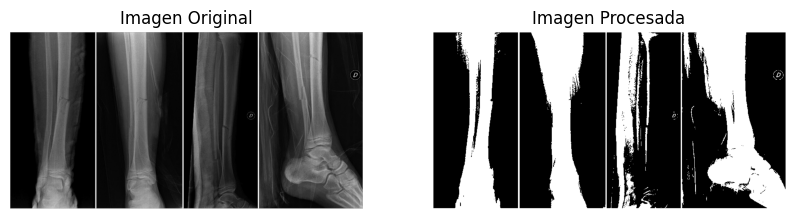

In [177]:
#Segmentación con Otsu
thresh_otsu = threshold_otsu(image)
binary_otsu = image > thresh_otsu
comparar_images(image, binary_otsu)

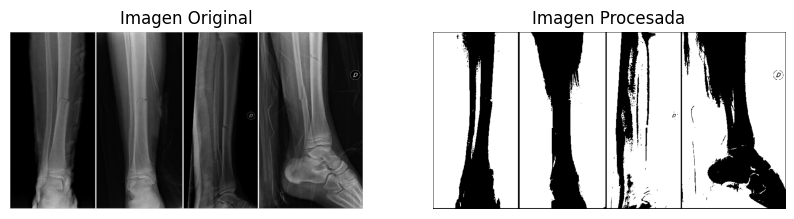

In [178]:
#Umbralización
thresh_value = 0.28
binary_manual = image <= thresh_value
comparar_images(image, binary_manual)

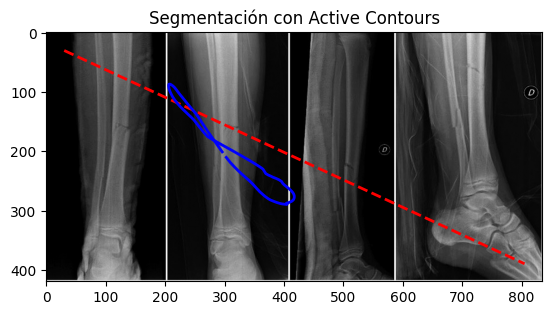

In [179]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters
from skimage.segmentation import active_contour
from skimage.draw import polygon_perimeter

# Definir puntos iniciales cerca de los bordes detectados
rows, cols = image.shape
x = np.linspace(30, cols-30, 100)  # Ajustar según la imagen
y = np.linspace(30, rows-30, 100)
init = np.array([x, y]).T

# Aplicar Active Contour
snake = active_contour(filters.gaussian(image, 1), init, alpha=0.0001, beta=0.5, gamma=0.001)

# Mostrar resultados
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '--r', lw=2)  # Contorno inicial
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=2)  # Contorno final
ax.set_title("Segmentación con Active Contours")
plt.show()